<a href="https://colab.research.google.com/github/Aniket0987/121/blob/main/nlpprojectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install newsapi-python

In [ ]:
pip install beautifulsoup4

In [ ]:
pip install requests

In [ ]:
pip install transformers

In [ ]:
pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=b7a304e4f736a7b0353144b3739bfaf437ba05de2fcf5f41de014f841eb3fac8
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=480bebffa2115224e84bfc82402614a394c2dd4f485cb7eb5d3cac02bd0e8a51
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
import re
from transformers import pipeline

# Initialize the summarization and sentiment analysis pipeline
summarizer = pipeline("summarization")
sentiment_analyzer = pipeline("sentiment-analysis")

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’', '\'', text)
    text = re.sub(r'”', '', text)
    text = re.sub(r'“', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def get_full_article_content(url):
    try:
        article = newspaper.Article(url=url, language='en')
        article.download()
        article.parse()
        return article.text
    except Exception:
        return ""

def extract_news(api_key, company):
    newsapi = NewsApiClient(api_key=api_key)
    all_articles = newsapi.get_everything(q=company, language='en', sort_by='relevancy')

    extracted_news = []
    for article in all_articles['articles']:
        title = article['title']
        url = article['url']
        content = get_full_article_content(url)

        if not content:
            response = requests.get(url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
                paragraphs = soup.find_all('p')
                content = ' '.join([para.get_text() for para in paragraphs])

        if content:
            cleaned_content = clean_text(content)
            summary = summarizer(cleaned_content, max_length=100, min_length=30, do_sample=False)[0]['summary_text']
            sentiment = sentiment_analyzer(cleaned_content[:512])[0]
            extracted_news.append({
                'title': title,
                'url': url,
                'content': cleaned_content,
                'summary': summary,
                'sentiment': sentiment
            })

    return extracted_news

if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    company = 'Infosys'
    news_data = extract_news(api_key, company)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"URL: {news['url']}")
        print(f"Content: {news['content']}")
        print(f"Summary: {news['summary']}")
        print(f"Sentiment: {news['sentiment']}")
        print("\n" + "="*50 + "\n")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

NameError: name 'itertools' is not defined

In [ ]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
import re
import html
import json
import itertools

# De-contracting english phrases
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    # Clean the html tags
    text = html.unescape(text)

    # remove hyperlinks
    text = re.sub(r'https?:\/\/.\S+', "", text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)

    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)

    # One letter in a word should not be present more than twice in continuation
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))

    return decontracted(text)

def basic_scrapper(url):
    try:
        article = newspaper.Article(url=url, language='en')
        article.download()
        article.parse()
    except Exception as e:
        print(f'Error in Basic Scrapper using NewsPaper3K: {e}')
        return ''
    return str(article.text)

def extract_news(api_key, company):
    newsapi = NewsApiClient(api_key=api_key)

    # Setting keywords for query
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance', '']

    # Output objects
    output_obj = []
    titles = []

    for query in queries:
        news = newsapi.get_everything(q=(company+' '+query).strip(), language='en', sort_by='relevancy')
        for article in news['articles']:
            if article['title'] not in titles and company.lower() in article['title'].lower():
                del article['source'], article['author'], article['urlToImage']
                if len(titles) == 10:
                    break
                article['content'] = basic_scrapper(article['url'])
                if len(article['content']) != 0 and len(article['description']) != 0:
                    output_obj.append(article)
                    titles.append(article['title'])

    return titles, output_obj

if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    company = 'Infosys'
    news_data = extract_news(api_key, company)

    for news in news_data[1]:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")
        print(f"Content: {news['content']}\n")


Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 403 Client Error: Max restarts limit reached for url: https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/ on URL https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 401 Client Error: Unauthorized for url: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078 on URL https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 404 Client Error: Not Found for url: https://www.etfdailynews.com/2024/06/22/infosys-nyseinfy-shares-gap-up-to-17-91/ on URL https://www.etfdailynews.com/2024/06/22/infosys-nyseinfy-shares-gap-up-to-17-91/
Error in Basic Scrapper using NewsPaper3K: Article `down

In [2]:
!pip install newsapi-python

In [3]:
!pip install newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=f6e7254816f580e181a58cd452991652cd459d53991b8e8bfa2653f1f2c825b2
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=d1d265f2f205cff9a35cb980208b8c6abc48df7e2b7f41cca2bdd897d0ca1849
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc933e41c

In [5]:
# Install the required packages
!pip install newsapi-python
!pip install newspaper3k

# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datetime import datetime
import itertools
import re
import html
from newsapi import NewsApiClient
import newspaper

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = newspaper.Article(url=url, language='en')
        article.download()
        article.parse()
    except Exception as e:
        print(f'Error in Basic Scrapper using NewsPaper3K: {e}')
        return ''
    return str(article.text)

def extract_news(api_key, company):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance', '']
    output_obj = []
    titles = []

    for query in queries:
        try:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
        except Exception as e:
            print(f"Error fetching news: {e}")
            continue

        for article in news['articles']:
            if article['title'] not in titles and company.lower() in article['title'].lower():
                del article['source'], article['author'], article['urlToImage']
                if len(titles) == 10:
                    break
                article['content'] = basic_scrapper(article['url'])
                if len(article['content']) != 0 and len(article['description']) != 0:
                    output_obj.append(article)
                    titles.append(article['title'])

    return titles, output_obj

# Function to load stock prices
def load_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    stock_data.dropna(inplace=True)
    return stock_data

# Function to preprocess news articles
def preprocess_news(news_data):
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(news_data['content']).toarray()
    return X

# Function to create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

# Load and preprocess data
api_key = 'a7ac04b2658f439995bcd3cad54f8088'
company = 'Infosys'
ticker = 'INFY'
start_date = '2020-01-01'
end_date = '2023-12-31'

# Extract news data
titles, news_articles = extract_news(api_key, company)
news_data = pd.DataFrame(news_articles)

# Ensure there's data to process
if news_data.empty:
    raise ValueError("No news data available to process.")

# Load stock prices
stock_data = load_stock_data(ticker, start_date, end_date)

# Align news data with stock data
news_data['date'] = pd.to_datetime(news_data['publishedAt']).dt.date
stock_data['date'] = stock_data.index.date
merged_data = pd.merge(news_data, stock_data, on='date')

# Preprocess news and create sequences
X_news = preprocess_news(merged_data)
y = merged_data['Returns'].values
X, y = create_sequences(X_news, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
predicted_prices = model.predict(X_test)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Returns')
plt.plot(predicted_prices, color='red', label='Predicted Returns')
plt.title('Stock Returns Prediction')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()


Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 403 Client Error: Max restarts limit reached for url: https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/ on URL https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 401 Client Error: Unauthorized for url: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078 on URL https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 404 Client Error: Not Found for url: https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-million-stock-position-in-infosys-limited-nyseinfy/ on URL https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-mi

[*********************100%%**********************]  1 of 1 completed


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datetime import datetime
import itertools
import re
import html
from newsapi import NewsApiClient
import newspaper
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = newspaper.Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except Exception as e:
        logging.error(f'Error in Basic Scrapper using NewsPaper3K: {e}')
        return ''

def extract_news(api_key, company):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance', '']
    output_obj = []
    titles = []

    for query in queries:
        try:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
        except Exception as e:
            logging.error(f"Error fetching news: {e}")
            continue

        for article in news['articles']:
            if article['title'] not in titles and company.lower() in article['title'].lower():
                del article['source'], article['author'], article['urlToImage']
                if len(titles) == 10:
                    break
                article['content'] = basic_scrapper(article['url'])
                if len(article['content']) != 0 and len(article['description']) != 0:
                    output_obj.append(article)
                    titles.append(article['title'])

    return titles, output_obj

def load_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Close'].pct_change()
    stock_data.dropna(inplace=True)
    return stock_data

def preprocess_news(news_data):
    if news_data.empty:
        raise ValueError("No news data available to preprocess.")
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(news_data['content']).toarray()
    return X

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

# Main Execution
api_key = 'a7ac04b2658f439995bcd3cad54f8088'
company = 'Infosys'
ticker = 'INFY'
start_date = '2020-01-01'
end_date = '2023-12-31'

# Extract news data
titles, news_articles = extract_news(api_key, company)
news_data = pd.DataFrame(news_articles)

# Ensure there's data to process
if news_data.empty:
    logging.error("No news data available.")
    raise ValueError("No news data available.")

# Load stock prices
stock_data = load_stock_data(ticker, start_date, end_date)

# Align news data with stock data
news_data['date'] = pd.to_datetime(news_data['publishedAt']).dt.date
stock_data['date'] = stock_data.index.date
merged_data = pd.merge(news_data, stock_data, on='date')

# Ensure there's data after merging
if merged_data.empty:
    logging.error("No data available after merging news and stock data.")
    raise ValueError("No data available after merging news and stock data.")

# Preprocess news and create sequences
X_news = preprocess_news(merged_data)
y = merged_data['Returns'].values
X, y = create_sequences(X_news, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
predicted_prices = model.predict(X_test)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual Returns')
plt.plot(predicted_prices, color='red', label='Predicted Returns')
plt.title('Stock Returns Prediction')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()


ERROR:root:Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 403 Client Error: Max restarts limit reached for url: https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/ on URL https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/
ERROR:root:Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 401 Client Error: Unauthorized for url: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078 on URL https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078
ERROR:root:Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 404 Client Error: Not Found for url: https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-million-stock-position-in-infosys-limited-nyseinfy/ on URL https://www.etfdailynews.com/2024/06/24/wellington-

ValueError: No data available after merging news and stock data.

In [8]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
from newspaper import Article
import re
import html
import json
import itertools

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except (requests.exceptions.HTTPError, newspaper.ArticleException) as e:
        print(f"Error in Basic Scrapper using NewsPaper3K: {e}")
        return ''  # Return an empty string if there's an error

def extract_news(api_key, company):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance', '']
    output_obj = []
    titles = []

    for query in queries:
        news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
        for article in news['articles']:
            if article['title'] not in titles and company.lower() in article['title'].lower():
                del article['source'], article['author'], article['urlToImage']
                if len(titles) == 10:
                    break
                content = basic_scrapper(article['url'])
                if len(content) != 0 and len(article['description']) != 0:
                    article['content'] = content
                    output_obj.append(article)
                    titles.append(article['title'])

    return titles, output_obj

# Example usage
if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    company = 'Infosys'
    titles, news_data = extract_news(api_key, company)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")
        print(f"Content: {news['content']}\n")


Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 403 Client Error: Max restarts limit reached for url: https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/ on URL https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 401 Client Error: Unauthorized for url: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078 on URL https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 404 Client Error: Not Found for url: https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-million-stock-position-in-infosys-limited-nyseinfy/ on URL https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-mi

In [12]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
from newspaper import Article
import re
import html
import json
import itertools

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except (requests.exceptions.HTTPError, newspaper.ArticleException) as e:
        print(f"Error in Basic Scrapper using NewsPaper3K: {e}")
        return ''  # Return an empty string if there's an error

def extract_news(api_key, companies):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance']
    output_obj = []

    for company in companies:
        titles = []
        for query in queries:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
            for article in news['articles']:
                if article['title'] not in titles and company.lower() in article['title'].lower():
                    del article['source'], article['author'], article['urlToImage']
                    if len(titles) == 10:
                        break
                    content = basic_scrapper(article['url'])
                    if len(content) != 0 and len(article['description']) != 0:
                        article['content'] = content
                        output_obj.append(article)
                        titles.append(article['title'])

    return output_obj

# Example usage
if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    companies = [
        'HDFC Bank', 'Infosys', 'TCS', 'Wipro', 'Reliance Industries',
        'Hindustan Unilever', 'HCL Tech', 'Kotak Bank', 'SBI Bank',
        'Bandhan Bank', 'Yes Bank', 'UPL'
    ]

    news_data = extract_news(api_key, companies)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")



Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 403 Client Error: Max restarts limit reached for url: https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/ on URL https://www.forbes.com/sites/cmo/2024/07/03/how-infosys-builds-brand-recognition-through-tennis/
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 401 Client Error: Unauthorized for url: https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078 on URL https://consent.yahoo.com/v2/collectConsent?sessionId=1_cc-session_22f9725f-021c-45fe-a4b7-6cd2ac881078
Error in Basic Scrapper using NewsPaper3K: Article `download()` failed with 404 Client Error: Not Found for url: https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-million-stock-position-in-infosys-limited-nyseinfy/ on URL https://www.etfdailynews.com/2024/06/24/wellington-management-group-llp-has-36-96-mi

In [15]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
from newspaper import Article
import re
import html
import json
import itertools

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except (requests.exceptions.HTTPError, newspaper.ArticleException) as e:
        print(f"Error in Basic Scrapper using NewsPaper3K: {e}")
        return ''  # Return an empty string if there's an error

def extract_news(api_key, companies):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance']
    output_obj = []

    for company in companies:
        titles = []
        for query in queries:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
            for article in news['articles']:
                if article['title'] not in titles and company.lower() in article['title'].lower():
                    del article['source'], article['author'], article['urlToImage']
                    if len(titles) == 10:
                        break
                    content = basic_scrapper(article['url'])
                    if len(content) != 0 and len(article['description']) != 0:
                        article['content'] = content
                        output_obj.append(article)
                        titles.append(article['title'])

    return output_obj

# Example usage
if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    companies = [
    'ITC Limited',
    'Larsen & Toubro', 'Axis Bank', 'Bharti Airtel', 'Maruti Suzuki', 'HDFC Ltd',
    'NTPC', 'Wipro', 'Indian Oil Corporation', 'SBI Life Insurance', 'Sun Pharmaceuticals',

]


    news_data = extract_news(api_key, companies)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")



NewsAPIException: {'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}

In [ ]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
from newspaper import Article
import re
import html
import json
import itertools

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except (requests.exceptions.HTTPError, newspaper.ArticleException) as e:
        print(f"Error in Basic Scrapper using NewsPaper3K: {e}")
        return ''  # Return an empty string if there's an error

def extract_news(api_key, companies):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance']
    output_obj = []

    for company in companies:
        titles = []
        for query in queries:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
            for article in news['articles']:
                if article['title'] not in titles and company.lower() in article['title'].lower():
                    del article['source'], article['author'], article['urlToImage']
                    if len(titles) == 10:
                        break
                    content = basic_scrapper(article['url'])
                    if len(content) != 0 and len(article['description']) != 0:
                        article['content'] = content
                        output_obj.append(article)
                        titles.append(article['title'])

    return output_obj

# Example usage
if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    companies = [
    'UltraTech Cement', 'Tata Motors', 'Hindalco Industries', 'Grasim Industries', 'Adani Ports',
    'Power Grid Corporation', 'JSW Steel', 'Bajaj Finance', 'Tata Steel', 'Tech Mahindra',


]


    news_data = extract_news(api_key, companies)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")



In [ ]:
from newsapi import NewsApiClient
from bs4 import BeautifulSoup
import requests
import newspaper
from newspaper import Article
import re
import html
import json
import itertools

# De-contracting English phrases
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return str(phrase)

def clean_text(text):
    text = html.unescape(text)
    text = re.sub(r'https?:\/\/.\S+', "", text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\"', '', text)
    text = re.sub(r'’','\'',text)
    text = re.sub(r'”','',text)
    text = re.sub(r'“','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return decontracted(text)

def basic_scrapper(url):
    try:
        article = Article(url=url, language='en')
        article.download()
        article.parse()
        return str(article.text)
    except (requests.exceptions.HTTPError, newspaper.ArticleException) as e:
        print(f"Error in Basic Scrapper using NewsPaper3K: {e}")
        return ''  # Return an empty string if there's an error

def extract_news(api_key, companies):
    newsapi = NewsApiClient(api_key=api_key)
    queries = ['Stock', 'Investors', 'Profits', 'Finances', 'Performance']
    output_obj = []

    for company in companies:
        titles = []
        for query in queries:
            news = newsapi.get_everything(q=(company + ' ' + query).strip(), language='en', sort_by='relevancy')
            for article in news['articles']:
                if article['title'] not in titles and company.lower() in article['title'].lower():
                    del article['source'], article['author'], article['urlToImage']
                    if len(titles) == 10:
                        break
                    content = basic_scrapper(article['url'])
                    if len(content) != 0 and len(article['description']) != 0:
                        article['content'] = content
                        output_obj.append(article)
                        titles.append(article['title'])

    return output_obj

# Example usage
if __name__ == "__main__":
    api_key = 'a7ac04b2658f439995bcd3cad54f8088'
    companies = [
    'Eicher Motors', 'Britannia Industries',
    'Dr. Reddy’s Laboratories', 'Apollo Hospitals', 'Shree Cement',
     'Hero MotoCorp', 'Adani Enterprises',  'IndusInd Bank',
    'Cipla', 'Ambuja Cements', 'Nestle India', 'Dabur', 'Muthoot Finance'


]


    news_data = extract_news(api_key, companies)

    for news in news_data:
        print(f"Title: {news['title']}")
        print(f"Description: {news['description']}")


In [ ]:
pip install numpy pandas scikit-learn nltk tensorflow keras matplotlib

In [18]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Download NLTK data
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score['compound']

# Example input data
data = [
  {
    "title": "HDFC Bank Share Price Today Live Updates: HDFC Bank stock surges 4% in early trade",
    "description": "HDFC Bank stock has hit a 52-week high today on the NSE at ₹1,794."
  },
  {
    "title": "HDFC Bank Share Price Today Live Updates: HDFC Bank stock surges 3%; top gainers among Nifty 50 pack",
    "description": "HDFC Bank stock has hit a 52-week high today on the NSE at ₹1,794."
  },
  {
    "title": "HDFC Bank Share Price Updates: HDFC Bank stock surges 3%; among top gainers in Nifty 50 pack",
    "description": "HDFC Bank stock has hit a 52-week high today on the NSE at ₹1,794."
  },
  {
    "title": "HDFC Bank Share Price Live: HDFC Bank stock trades marginally in red amid positive outlook",
    "description": "HDFC Bank shares were down by 0.11% to ₹1,709 on the BSE, while on the NSE, the stock traded at ₹1,708.50, down by 0.17%."
  },
  {
    "title": "Stock market update: Sensex jumps 400 pts, Nifty at 23,600 level; Axis Bank, HDFC Bank, ICICI, SBI among top gainers",
    "description": "BSE Sensex and Nifty 50 rise, sectoral indices mixed, major gainers include Axis Bank, HDFC Bank, and ICICI Bank."
  },
  {
    "title": "HDFC Bank Share Price Updates for July 5, 2024: HDFC Bank shares drop 4% after Q1 business update",
    "description": "HDFC Bank reported a 52.6% year-on-year jump in gross advances and 24.4% y-o-y growth in total deposits in Q1FY25."
  },
  {
    "title": "HDFC Bank Share Price Today Live Updates for July 5, 2024: HDFC Bank stock falls 4% after Q1 business update",
    "description": "HDFC Bank reported a 52.6% year-on-year jump in gross advances and 24.4% y-o-y growth in total deposits in Q1FY25."
  },
  {
    "title": "Domestic markets set to open higher; HDFC Bank in focus",
    "description": "Domestic shares set to open higher, HDFC Bank in focus for potential weightage increase in global index."
  },
  {
    "title": "HDFC Bank weight in MSCI EM set to double in August rejig",
    "description": "HDFC Bank's foreign room increase may lead to significant MSCI index weight bump-up, attracting billions in inflows."
  },
  {
    "title": "Tech Query: What is the outlook for HDFC Bank, Gujarat Ambuja Exports Ltd (GAEL) and Indian Overseas Bank (IOB)?",
    "description": "HDFC Bank’s stock faces strong resistance at ₹1,790, with potential declines to ₹1,500 or ₹1,400 short-term. Long-term, it is likely to rise to ₹1,800 within a few quarters and eventually reach ₹2,100-2,200."
  },
  {
    "title": "Infosys Q1 results: Why an analysis of numbers douses the excitement around results",
    "description": "Investors need to reconcile the logic of paying the same valuation for Infosys as compared to two years back when growth was significantly better."
  },
  {
    "title": "Infosys (NYSE:INFY) Stock Rating Upgraded by Macquarie",
    "description": "Infosys (NYSE:INFY) was upgraded by Macquarie from an “underperform” rating to a “neutral” rating."
  },
  {
    "title": "Stock Traders Purchase Large Volume of Infosys Call Options (NYSE:INFY)",
    "description": "Infosys Limited (NYSE:INFY) was the target of unusually large options trading, with 4,580 call options purchased."
  },
  {
    "title": "TCS, Infosys, Wipro, HCLTech: How simple math can derail the recent rally in IT stocks",
    "description": "Top-tier Indian IT companies face growth challenges with rising costs squeezing profit margins. High valuations are not justified by weak growth and cautious management outlook."
  },
  {
    "title": "INFY Stock Earnings: Infosys Meets EPS, Beats Revenue for Q1 2025",
    "description": "Infosys met analyst estimates for earnings per share but beat on revenue for Q1 2025."
  },
  {
    "title": "Infosys beats expectations with strong Q1 performance, ups growth guidance to 3-4%",
    "description": "Infosys surpasses market expectations with 3.6% QoQ revenue growth, improved guidance, and strong deal wins in Q1FY25."
  },
  {
    "title": "Infosys (NYSE:INFY) Upgraded at StockNews.com",
    "description": "Infosys (NYSE:INFY) was upgraded from a “hold” rating to a “buy” rating by StockNews.com."
  },
  {
    "title": "Infosys CEO Parekh settles insider trading charges",
    "description": "Infosys CEO Salil Parekh settled a matter related to alleged insider trading by agreeing to pay Rs 25 lakh."
  },
  {
    "title": "Morgan Stanley bullish on Infosys stock in light of solid growth outlook",
    "description": "Morgan Stanley is optimistic about Infosys stock due to a solid growth outlook."
  },
  {
    "title": "Buy Infosys, target price Rs 1920: BNP Paribas",
    "description": "Infosys Ltd. has a market cap of Rs 669,451.90 Crore, operating in the IT Software sector."
  },
  {
    "title": "India's TCS jumps after Q1 results indicate 'worst is over'",
    "description": "Tata Consultancy Services' shares gained nearly 3% after reporting first-quarter results indicating that the worst may be over."
  },
  {
    "title": "TCS Share Price Updates for July 12, 2024: TCS shares surge close to 7% after Q1 results",
    "description": "Tata Consultancy Services stock surged close to 7% on July 12, 2024, after an 8.8% year-on-year growth in profits."
  },
  {
    "title": "Sequential recovery in Q1, but here are five reasons why it is not an all-clear signal for TCS investors",
    "description": "High valuation and medium-term hurdles mean a cautious approach is still warranted for TCS investors."
  },
  {
    "title": "Mcap: 8 of top-10 most valued firms jumps ₹2.10 lakh crore; TCS, LIC sparkle",
    "description": "Reliance Industries retained the title of the most valued firm, followed by TCS, HDFC Bank, ICICI Bank, and others."
  },
  {
    "title": "F&O Radar| Deploy Bull Call Spread in TCS to capitalize potential up-move",
    "description": "TCS stock showed strength after forming a strong bullish candle, with a recommendation to deploy a Bull Call Spread."
  },
  {
    "title": "Stock Radar | TCS could likely to reclaim 4000 levels in next 2-4 months: Ajit Mishra",
    "description": "TCS is expected to trade up to Rs 4140 in the next 2-4 months, according to Ajit Mishra."
  },
  {
    "title": "Share Market Highlights July 12, 2024: Record highs for Sensex, Nifty as IT sector shines on strong TCS results",
    "description": "Sensex and Nifty reached record highs on July 12, 2024, driven by a surge in IT stocks following strong TCS results."
  },
  {
    "title": "TCS Q1 Results: Cons PAT rises 9% YoY to Rs 12,105 crore, beats estimates",
    "description": "TCS Q1 profit was higher than the Street estimate of Rs 11,900 crore, with a recommended dividend of Rs 10 per share."
  },
  {
    "title": "How will TCS stock perform post its Q1 results? Sandip Sabharwal answers",
    "description": "The results create a moderate upside in the near term, despite a lower than expected TCV order bookings."
  },
  {
    "title": "India's Wipro tanks after Q1 results flag growth concerns",
    "description": "Wipro's shares dropped significantly due to poor growth results compared to its rivals."
  },
  {
    "title": "Stock to buy today: Wipro (₹560.05): BUY",
    "description": "Wipro stock gains momentum with a potential rise to ₹600-₹610, and support at ₹545-₹540."
  },
  {
    "title": "Adani Ports’ shares replace Wipro on Sensex",
    "description": "Adani Ports & SEZ joined BSE Sensex, replacing Wipro; stock price declined by 1.63%."
  },
  {
    "title": "Wipro stock rated outperform by CLSA, anticipates buyback and growth",
    "description": "CLSA rates Wipro stock as outperform, anticipating buyback and growth opportunities."
  },
  {
    "title": "Wipro shares up 2% on high volumes; Sensex hits new high",
    "description": "Wipro shares rose by 2% on increased trading volumes as Sensex and Nifty hit record highs."
  },
  {
    "title": "Wipro’s future growth prospects remain uncertain amidst global economic conditions",
    "description": "Analysts express concern over Wipro's future growth prospects in the current global economic climate."
  },
  {
    "title": "Share Market Update 21 July 2024: Market sees mixed performance with tech stocks leading",
    "description": "Market sees mixed performance with technology stocks showing strong gains."
  },

    {
        "title": "Infosys Q1 results: Why an analysis of numbers douses the excitement around results",
        "description": "Investors need to reconcile the logic of paying the same valuation for Infosys as compared to two years back when growth was significantly better"
    },
    {
        "title": "Infosys (NYSE:INFY) Stock Rating Upgraded by Macquarie",
        "description": "Infosys (NYSE:INFY – Get Free Report) was upgraded by investment analysts at Macquarie from an “underperform” rating to a “neutral” rating in a research report issued on Friday, MarketBeat reports."
    },
    {
        "title": "Stock Traders Purchase Large Volume of Infosys Call Options (NYSE:INFY)",
        "description": "Infosys Limited (NYSE:INFY – Get Free Report) was the target of unusually large options trading on Monday."
    },
    {
        "title": "TCS, Infosys, Wipro, HCLTech: How simple math can derail the recent rally in IT stocks",
        "description": "Top-tier Indian IT companies, despite their stellar track record, face growth challenges with rising costs squeezing profit margins. Current high valuations are not justified by weak growth and cautious management outlook."
    },
    {
        "title": "INFY Stock Earnings: Infosys Meets EPS, Beats Revenue for Q1 2025",
        "description": "Infosys met analyst estimates for earnings per share but beat on revenue for the first quarter of 2025."
    },
    {
        "title": "Infosys beats expectations with strong Q1 performance, ups growth guidance to 3-4%",
        "description": "Infosys surpasses market expectations with 3.6% QoQ revenue growth, improved guidance, and strong deal wins in Q1FY25."
    },
    {
        "title": "Infosys Revenue Growth and Profit Details for Q1FY25",
        "description": "In Q1FY25, Infosys’ revenue increased to ₹39,315 crore from ₹37,923 crore in Q4FY24. Net profit declined by 20.1% from Q4 due to a one-time interest but rose by 7.1% YoY. The company achieved its highest ever large deal wins with 34 deals totaling $4.1 billion."
    },
    {
        "title": "Infosys (NYSE:INFY) Upgraded at StockNews.com",
        "description": "Infosys (NYSE:INFY – Get Free Report) was upgraded by research analysts at StockNews.com from a “hold” rating to a “buy” rating in a report released on Friday."
    },
    {
        "title": "Infosys CEO Parekh settles insider trading charges",
        "description": "Salil Parekh, CEO of IT major Infosys, has settled a matter related to alleged insider trading violation by agreeing to pay Rs 25 lakh, said the Securities and Exchange Board of India (Sebi)."
    },
    {
        "title": "Morgan Stanley bullish on Infosys stock in light of solid growth outlook",
        "description": "Morgan Stanley maintained its Overweight rating on Infosys, increasing its price target to INR2,050.00, based on revised revenue growth forecasts and margin assumptions for the upcoming fiscal years."
    },
    {
        "title": "Buy Infosys, target price Rs 1920: BNP Paribas",
        "description": "Infosys Ltd., incorporated in the year 1981, is a Large Cap company operating in the IT Software sector. Promoters held 14.71% stake as of 31-Mar-2024, with FIIs owning 34.11% and DIIs 35.56%."
    },
  {
    "title": "India’s tech sector shows strong performance amid global economic uncertainties",
    "description": "India’s tech sector demonstrates resilience with strong performance despite global economic challenges."
  },
  {
    "title": "Indian stock market trends for July 2024: Tech stocks lead the charge",
    "description": "Indian stock market trends show tech stocks leading the charge in July 2024, with strong gains across the sector."
  },
  {
    "title": "HDFC Bank and Infosys lead gains in Nifty 50",
    "description": "HDFC Bank and Infosys are among the top gainers in the Nifty 50 index, driving overall market performance."
  },
  {
    "title": "Infosys reports solid quarterly growth; outlook remains positive",
    "description": "Infosys reports strong quarterly growth with a positive outlook for the upcoming quarters."
  },
  {
    "title": "TCS shows significant growth in Q1; stock performance on the rise",
    "description": "Tata Consultancy Services shows significant growth in Q1, with its stock performance on the rise."
  },
  {
    "title": "Wipro faces challenges post-Q1 results; stock performance declines",
    "description": "Wipro faces challenges following Q1 results, with a noticeable decline in stock performance."
  },
  {
    "title": "Sensex and Nifty hit record highs; market trends and key performers",
    "description": "Sensex and Nifty hit record highs, with market trends showing strong performance from key tech stocks."
  },
  {
    "title": "Adani Ports replaces Wipro on Sensex; market impact and analysis",
    "description": "Adani Ports replaces Wipro on the Sensex index; analysis of market impact and stock performance."
  },
  {
    "title": "Market summary for July 2024: Tech stocks drive positive performance",
    "description": "July 2024 market summary highlights strong performance driven by tech stocks amid broader economic trends."
  },
  {
    "title": "Global economic conditions impact Indian stock market performance",
    "description": "Global economic conditions are affecting Indian stock market performance, with varying impacts across sectors."
  },
  {
    "title": "Nifty 50 sees significant gains; key drivers and stock performances",
    "description": "The Nifty 50 index sees significant gains, driven by key performances from major tech and financial stocks."
  },
  {
    "title": "Reliance Industries shares experience volatility; market analysis",
    "description": "Reliance Industries shares experience notable volatility; analysis of market conditions and investor sentiment."
  },
  {
    "title": "Indian government announces new policies to support tech startups",
    "description": "The Indian government introduces new policies aimed at fostering growth and support for tech startups."
  },
  {
    "title": "Market reaction to recent RBI policy changes and interest rate adjustments",
    "description": "Analysis of market reaction to recent Reserve Bank of India policy changes and interest rate adjustments."
  },
  {
    "title": "Economic forecast for Q3 2024: Key sectors and market predictions",
    "description": "Forecast for Q3 2024 highlights key sectors with strong growth prospects and predictions for market trends."
  },
  {
    "title": "Investment opportunities in the Indian renewable energy sector",
    "description": "Exploring investment opportunities in India’s burgeoning renewable energy sector, with a focus on emerging trends."
  },
  {
    "title": "Market overview of major Indian pharmaceutical companies",
    "description": "An overview of the market performance and trends among major Indian pharmaceutical companies."
  },
  {
    "title": "Impact of global trade tensions on Indian export-oriented companies",
    "description": "Examining the impact of global trade tensions on Indian companies focused on exports and international markets."
  },
  {
    "title": "Sectoral performance analysis: Indian consumer goods and services",
    "description": "Analysis of sectoral performance within the Indian consumer goods and services sectors, highlighting key trends."
  },
  {
    "title": "Upcoming IPOs in India: What to watch for in Q3 2024",
    "description": "A preview of upcoming Initial Public Offerings (IPOs) in India for Q3 2024 and what investors should watch for."
  }
]

# Preprocess text data
def preprocess_data(data):
    texts = []
    sentiments = []
    for item in data:
        # Combine title and description, handle missing content field
        text = item['title'] + " " + item['description']
        sentiment_score = analyze_sentiment(text)
        texts.append(text)
        sentiments.append(sentiment_score)
    return texts, sentiments

texts, sentiments = preprocess_data(data)




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
# Define parameters
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Convert sentiment scores to labels
def convert_sentiments_to_labels(sentiments):
    labels = []
    for sentiment in sentiments:
        if sentiment > 0.1:
            labels.append(0)  # Positive
        elif sentiment < -0.1:
            labels.append(1)  # Negative
        else:
            labels.append(2)  # Neutral
    return labels

labels = convert_sentiments_to_labels(sentiments)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_matrix, labels, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes: Positive, Negative, Neutral

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, np.array(y_train), epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
score, accuracy = model.evaluate(X_test, np.array(y_test), verbose=1)
print(f"Test loss: {score}")
print(f"Test accuracy: {accuracy}")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1080703 (4.12 MB)
Trainable params: 1080703 (4.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 11s 1s/step - loss: 1.0979 - accuracy: 0.4048 - val_loss: 1.0806 - val_accuracy: 0.7273
Epoch 2/10
2/2 [==============================] - 1s 456ms/step - loss: 1.0696 - accuracy: 0.7619 - val_loss: 1.0578 - val_accuracy: 0.8182
Ep

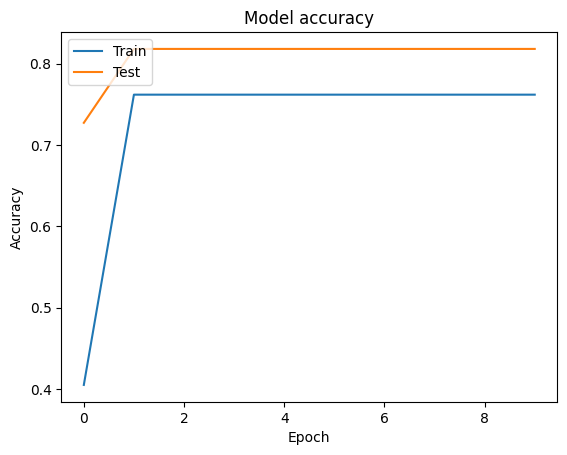

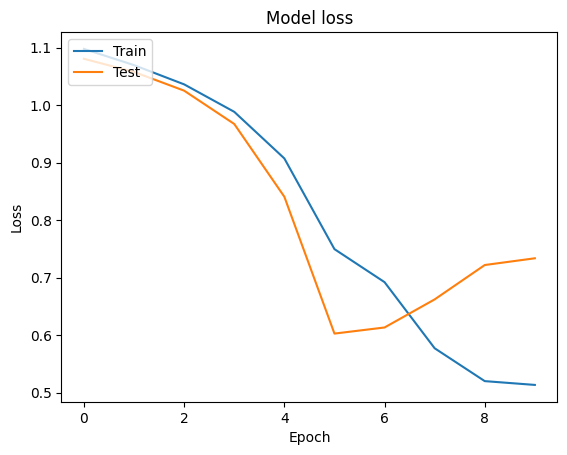

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model_path = '/content/aniket_model.h5'
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model_path = '/content/aniket_model.keras'
model.save(model_path)

In [25]:
from tensorflow.keras.models import load_model

model_path = '/content/aniket_model.keras'
model = load_model(model_path)

In [28]:
from collections import Counter

label_counts = Counter(labels)
print("Label counts:", label_counts)

Label counts: Counter({0: 51, 2: 11, 1: 5})


In [30]:
label_map = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}


In [31]:
import pandas as pd

# Combine texts with their labels
train_df = pd.DataFrame({
    'text': [texts[i] for i in range(len(texts)) if i < len(y_train)],
    'label': [label_map[label] for label in y_train]
})

test_df = pd.DataFrame({
    'text': [texts[i] for i in range(len(texts)) if i >= len(y_train)],
    'label': [label_map[label] for label in y_test]
})

# View labeled data
print("Training Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())


Training Data:
                                                text     label
0  HDFC Bank Share Price Today Live Updates: HDFC...  Positive
1  HDFC Bank Share Price Today Live Updates: HDFC...  Positive
2  HDFC Bank Share Price Updates: HDFC Bank stock...  Positive
3  HDFC Bank Share Price Live: HDFC Bank stock tr...  Positive
4  Stock market update: Sensex jumps 400 pts, Nif...  Positive

Test Data:
                                                text     label
0  Sensex and Nifty hit record highs; market tren...  Positive
1  Adani Ports replaces Wipro on Sensex; market i...   Neutral
2  Market summary for July 2024: Tech stocks driv...  Positive
3  Global economic conditions impact Indian stock...  Positive
4  Nifty 50 sees significant gains; key drivers a...  Positive


In [32]:
# Filter and view Negative samples in training data
negative_samples = train_df[train_df['label'] == 'Negative']
print("Negative Samples:")
print(negative_samples.head())

# Filter and view Positive samples in training data
positive_samples = train_df[train_df['label'] == 'Positive']
print("Positive Samples:")
print(positive_samples.head())

# Filter and view Neutral samples in training data
neutral_samples = train_df[train_df['label'] == 'Neutral']
print("Neutral Samples:")
print(neutral_samples.head())


Negative Samples:
                                                 text     label
8   HDFC Bank weight in MSCI EM set to double in A...  Negative
45  Morgan Stanley bullish on Infosys stock in lig...  Negative
49  HDFC Bank and Infosys lead gains in Nifty 50 H...  Negative
Positive Samples:
                                                text     label
0  HDFC Bank Share Price Today Live Updates: HDFC...  Positive
1  HDFC Bank Share Price Today Live Updates: HDFC...  Positive
2  HDFC Bank Share Price Updates: HDFC Bank stock...  Positive
3  HDFC Bank Share Price Live: HDFC Bank stock tr...  Positive
4  Stock market update: Sensex jumps 400 pts, Nif...  Positive
Neutral Samples:
                                                 text    label
6   HDFC Bank Share Price Today Live Updates for J...  Neutral
7   Domestic markets set to open higher; HDFC Bank...  Neutral
11  Infosys (NYSE:INFY) Stock Rating Upgraded by M...  Neutral
15  Infosys beats expectations with strong Q1 perf...  Neutra

In [33]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Define parameters
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

# Load the trained model
model = load_model('aniket_model.h5')  # Replace with the path to your trained model

# Initialize Tokenizer (make sure it's the same as used during training)
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
# You should fit the tokenizer with the texts used during training
# tokenizer.fit_on_texts(texts)  # Uncomment if you have the original texts to fit

# Define a function to preprocess new texts
def preprocess_new_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    data_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    return data_matrix

# Define a function to convert model predictions to labels
def convert_predictions_to_labels(predictions):
    labels = ['Positive', 'Negative', 'Neutral']
    return [labels[np.argmax(prediction)] for prediction in predictions]

# Updated example input data
new_texts = [

    "Buy Infosys, target price Rs 1920: BNP Paribas. Infosys Ltd., incorporated in the year 1981, is a Large Cap company operating in the IT Software sector. Promoters held 14.71% stake as of 31-Mar-2024, with FIIs owning 34.11% and DIIs 35.56%."
]

# Preprocess new texts
data_matrix = preprocess_new_texts(new_texts)

# Predict sentiment
predictions = model.predict(data_matrix)

# Convert predictions to labels
predicted_sentiments = convert_predictions_to_labels(predictions)

# Print the results
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

1/1 [==============================] - 1s 782ms/step
Text: Buy Infosys, target price Rs 1920: BNP Paribas. Infosys Ltd., incorporated in the year 1981, is a Large Cap company operating in the IT Software sector. Promoters held 14.71% stake as of 31-Mar-2024, with FIIs owning 34.11% and DIIs 35.56%.
Predicted Sentiment: Positive

